<a href="https://colab.research.google.com/github/marciosferreira/fins_removal_auto_encoderr/blob/main/Copy_of_Yet_another_copy_of_auto_encoder_trunk_and_head.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(250, 750)
Processadas 90 imagens de 'crop'
Processadas 90 imagens de 'no_crop'


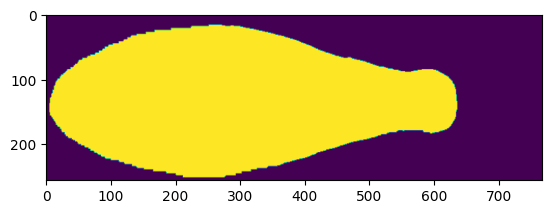

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


def cortar_imagem(imagem):
    # Assume que a imagem já está em escala de cinza, então não precisa converter
    # Encontra onde a imagem não é branca
    coords = np.column_stack(np.where(imagem < 255))
    x, y, w, h = cv2.boundingRect(coords)


    # Corta a imagem baseada nas coordenadas encontradas
    imagem_cortada = imagem[x:x+w, y:y+h]
    return imagem_cortada


def processar_imagem(caminho_imagem, tamanho_desejado=None):
    imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)  # Lê a imagem diretamente em escala de cinza
    if imagem is not None:
        if "entrada" in caminho_imagem:
            return imagem
        else:

            imagem_redimensionada_gray_tresh = 255 - imagem

            #imagem_redimensionada_gray_tresh = np.where(imagem_redimensionada_gray_tresh > 0, 1, 0)
            imagem_redimensionada_gray_tresh = np.where(imagem_redimensionada_gray_tresh < 5, 0, 255).astype(np.uint8)





            contours, hierarchy = cv2.findContours(imagem_redimensionada_gray_tresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            # Criar uma imagem de fundo preto com as mesmas dimensões da imagem original
            imagem = np.zeros_like(imagem)
            maior_contorno = max(contours, key=cv2.contourArea)
            # Desenhar o maior contorno na imagem de fundo preto de forma preenchida
            cv2.drawContours(imagem, [maior_contorno], 0, (255, 255, 255), -1)



            kernel = np.ones((3, 3), np.uint8)
            imagem = cv2.erode(imagem, kernel, iterations=1)
            imagem = cv2.dilate(imagem, kernel, iterations=1)






        imagem_cortada = imagem #cortar_imagem(imagem)
        if tamanho_desejado is not None:
            # Redimensiona a imagem cortada para o tamanho desejado
            imagem_redimensionada = cv2.resize(imagem_cortada, tamanho_desejado)
            return imagem_redimensionada
        return imagem_cortada
    return None



def processar_pasta(caminho_pasta, tamanho_desejado=None):
    imagens_processadas = []
    for nome_arquivo in sorted(os.listdir(caminho_pasta)):
        caminho_imagem = os.path.join(caminho_pasta, nome_arquivo)
        imagem_processada = processar_imagem(caminho_imagem)
        if imagem_processada is not None:
            # Se um tamanho desejado foi especificado, redimensiona a imagem
            if tamanho_desejado is not None:
                imagem_processada = cv2.resize(imagem_processada, tamanho_desejado)
            imagens_processadas.append(imagem_processada)
    return imagens_processadas

def main(caminho_base):
    crop_dir = os.path.join(caminho_base, 'saida')
    no_crop_dir = os.path.join(caminho_base, 'entrada')

    # Processa as imagens de cada pasta
    imagens_crop = processar_pasta(crop_dir)
    imagens_no_crop = processar_pasta(no_crop_dir)

    # Opcional: se você quer garantir que todas as imagens tenham o mesmo tamanho, determine o tamanho mínimo
    # Este passo assume que todas as imagens já foram processadas
    if imagens_crop and imagens_no_crop:
        alturas = [img.shape[0] for img in imagens_crop + imagens_no_crop]
        larguras = [img.shape[1] for img in imagens_crop + imagens_no_crop]
        altura_min = min(alturas)
        largura_min = min(larguras)

        # Redimensiona todas as imagens para o tamanho mínimo encontrado
        tamanho_min = (largura_min, altura_min)
        imagens_crop = [cv2.resize(img, tamanho_min) for img in imagens_crop]
        imagens_no_crop = [cv2.resize(img, tamanho_min) for img in imagens_no_crop]
        import numpy as np

        print(imagens_crop[0].shape)

        # Calcula o preenchimento necessário
        padding_height = (30, 30)  # 30 linhas no topo, 30 linhas na parte inferior
        padding_width = (2, 2)     # 2 colunas à esquerda, 2 colunas à direita
        padding_depth = (0, 0)     # Sem preenchimento necessário para a dimensão do canal

        # Calculando o preenchimento necessário
        padding_height = (30, 30)  # 30 linhas no topo e 30 linhas no fundo
        padding_width = (2, 2)     # 2 colunas à esquerda e 2 colunas à direita

        # Aplica o preenchimento a cada imagem
        # Para cada imagem no array

        #imagens_crop = [np.pad(img, (padding_height, padding_width), 'constant', constant_values=255) for img in imagens_crop]

        # Para cada imagem no array
        #imagens_no_crop = [np.pad(img, (padding_height, padding_width), 'constant', constant_values=255) for img in imagens_no_crop]


        # Verifica o novo shape do array de imagens



    # Aqui você tem duas listas de imagens processadas: imagens_crop e imagens_no_crop
    print(f"Processadas {len(imagens_crop)} imagens de 'crop'")
    print(f"Processadas {len(imagens_no_crop)} imagens de 'no_crop'")
    # Retornar as listas processadas se necessário
    return imagens_crop, imagens_no_crop

if __name__ == "__main__":
    caminho_base = "/content/drive/MyDrive/images_auto_encoder_training/pair_wise"
    imagens_crop, imagens_no_crop = main(caminho_base)

    #plt.imshow(imagens_crop[5])
    #plt.show()


    #plt.imshow(imagens_no_crop[5])
    #plt.show()


    novo_tamanho = (768, 256)  # OpenCV usa a ordem (largura, altura)

    imagens_crop = [imagem / 255.0 for imagem in imagens_crop]
    imagens_crop = [cv2.resize(imagem, novo_tamanho) for imagem in imagens_crop]

    imagens_no_crop = [imagem / 255.0 for imagem in imagens_no_crop]
    imagens_no_crop = [cv2.resize(imagem, novo_tamanho) for imagem in imagens_no_crop]







    plt.imshow(imagens_crop[0])
    plt.show()







    #imagens_crop = [(imagem >= 0.9).astype(float) for imagem in imagens_crop]
    #imagens_no_crop = [(imagem >= 0.9).astype(float) for imagem in imagens_no_crop]


















In [ ]:
imagens_crop[0].max()


1.0

In [ ]:
    imagens_crop = np.array(imagens_crop)
    #imagens_crop = 1.0 - imagens_crop

    imagens_crop = np.expand_dims(np.array(imagens_crop), axis=-1)

    imagens_no_crop = np.array(imagens_no_crop)
    #imagens_no_crop = 1.0 - imagens_no_crop
    imagens_no_crop = np.expand_dims(np.array(imagens_no_crop), axis=-1)

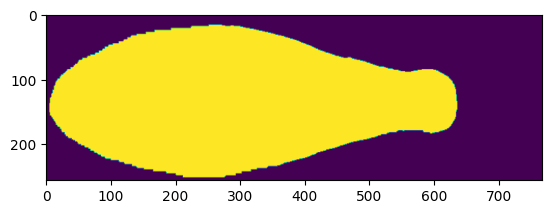

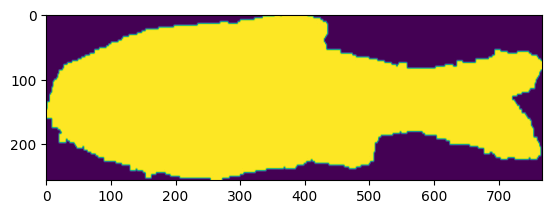

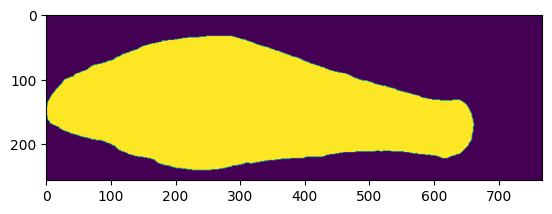

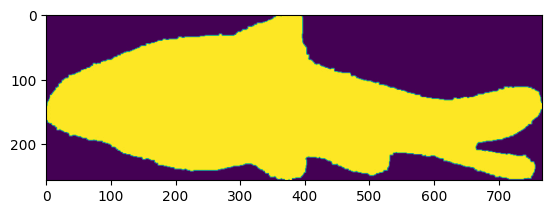

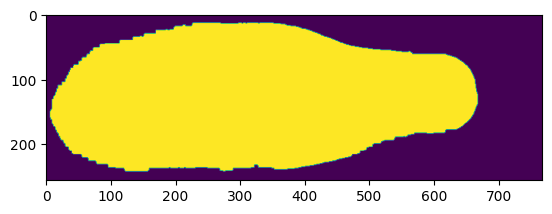

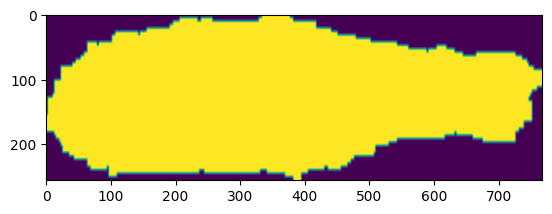

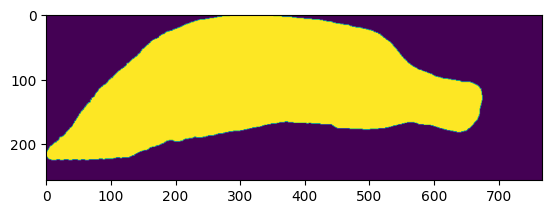

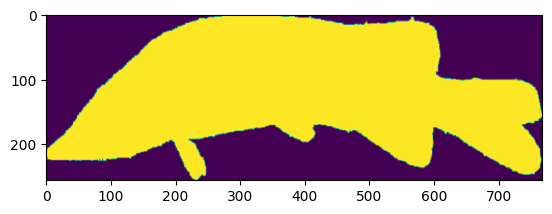

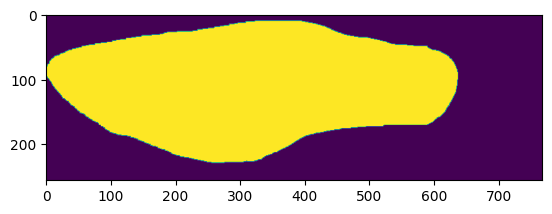

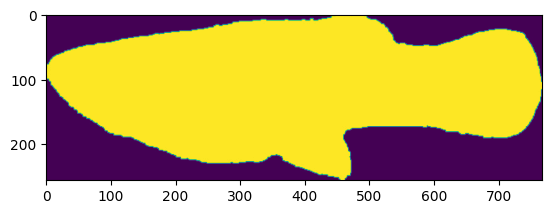

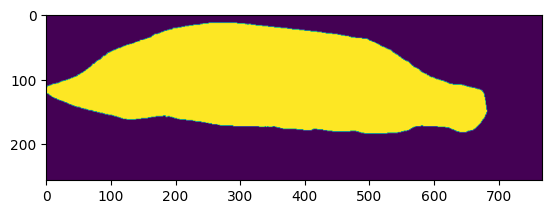

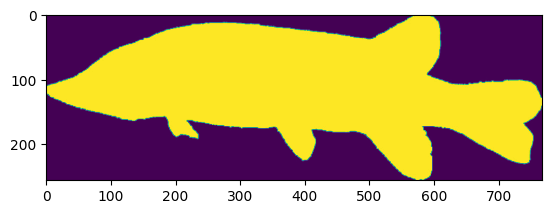

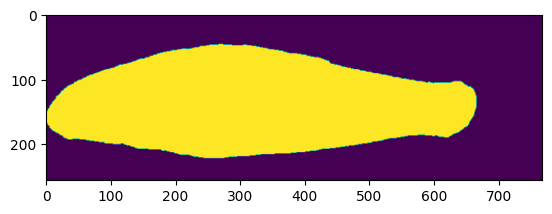

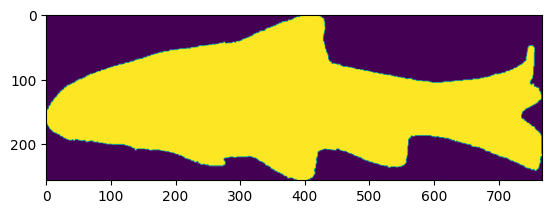

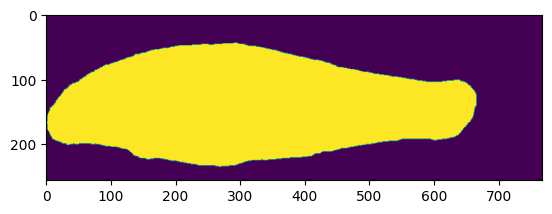

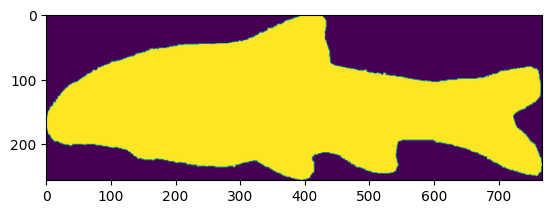

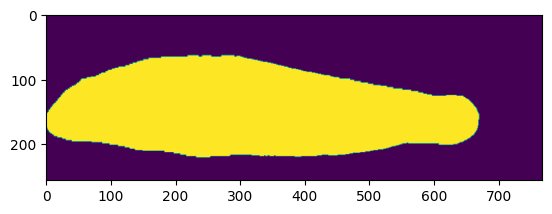

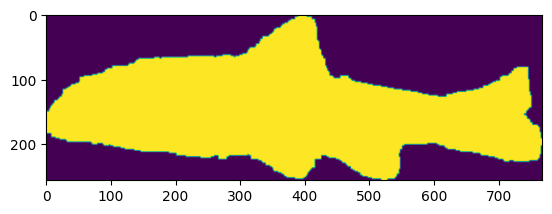

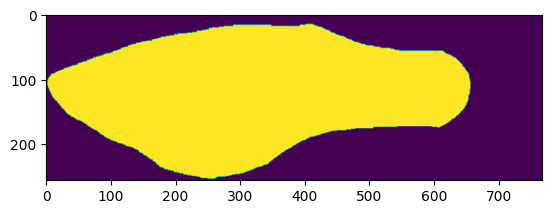

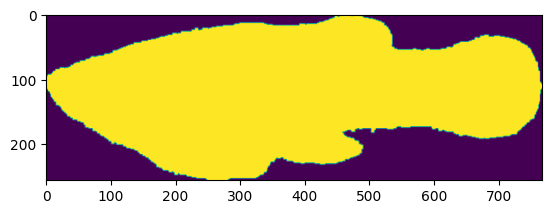

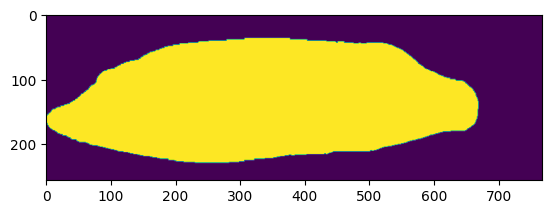

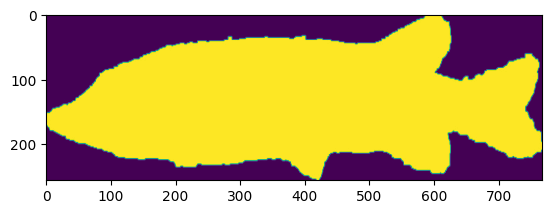

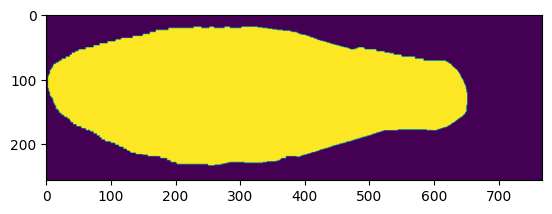

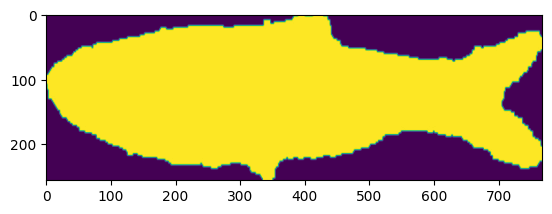

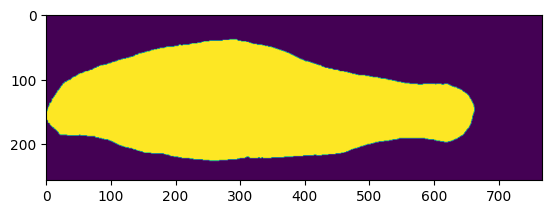

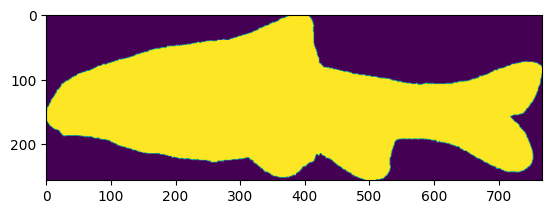

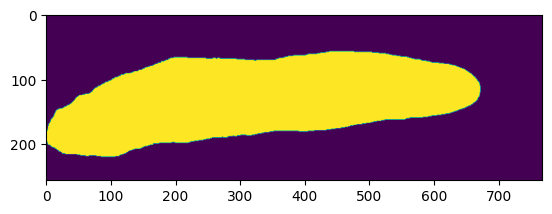

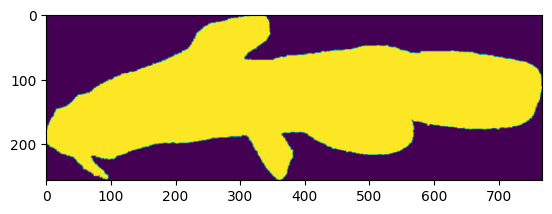

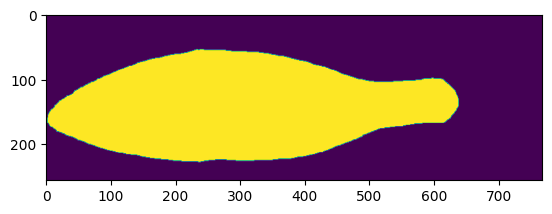

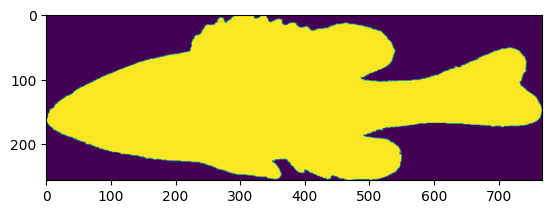

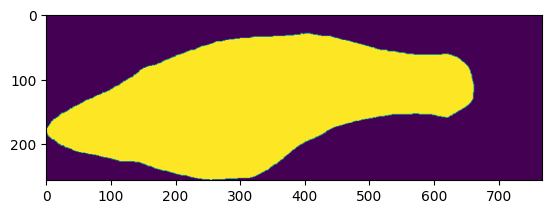

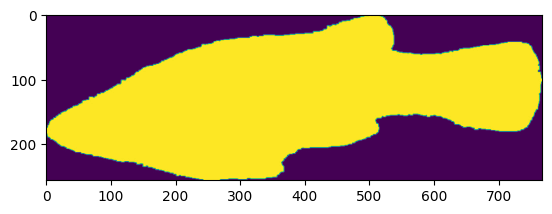

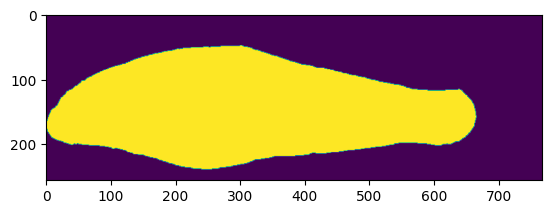

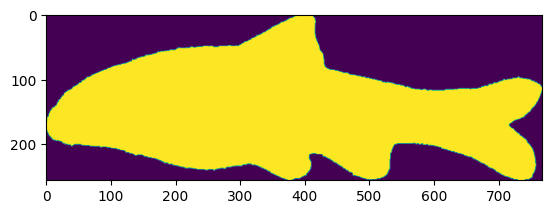

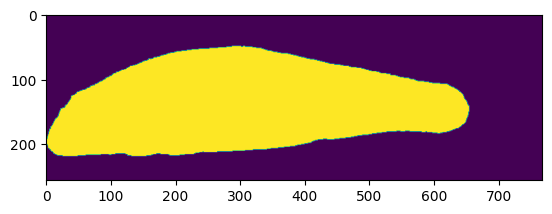

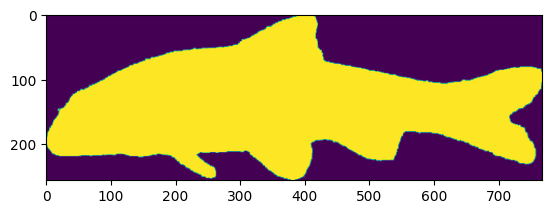

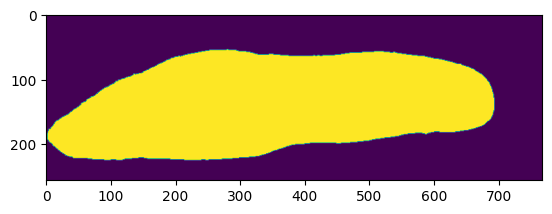

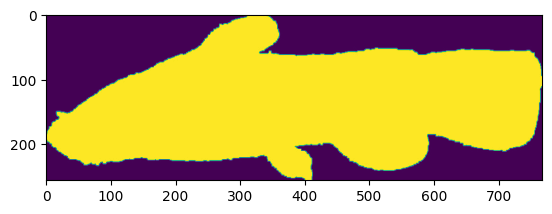

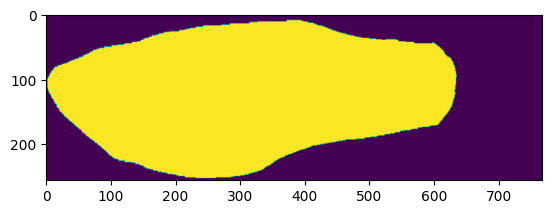

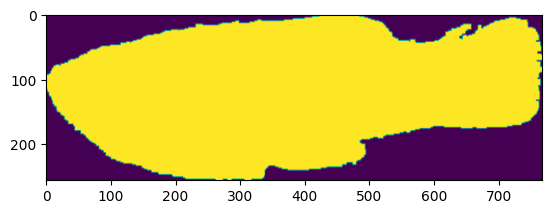

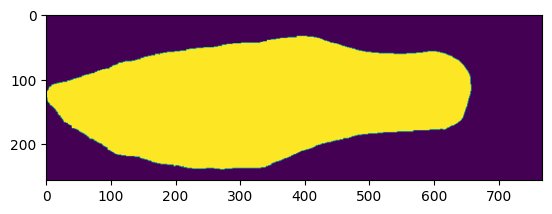

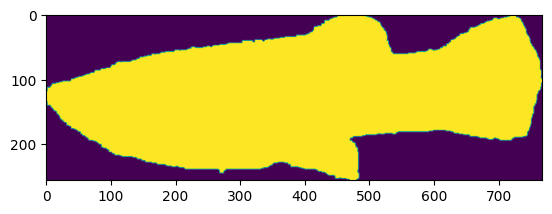

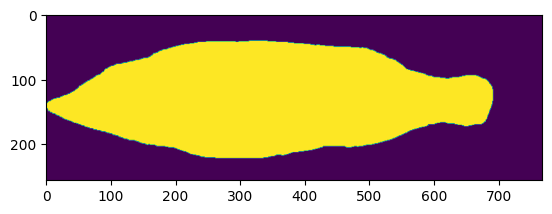

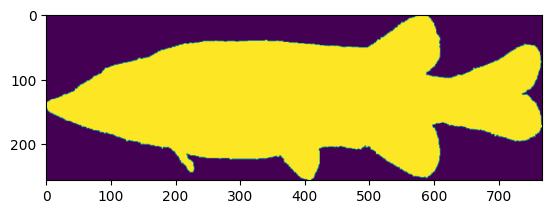

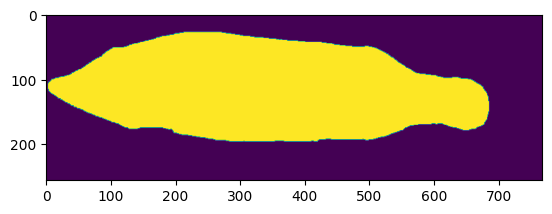

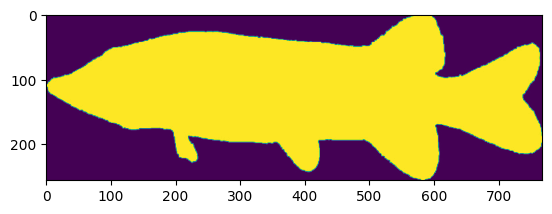

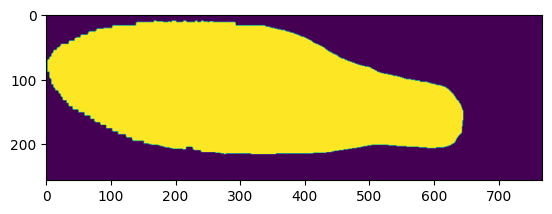

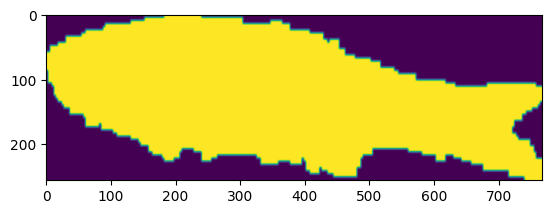

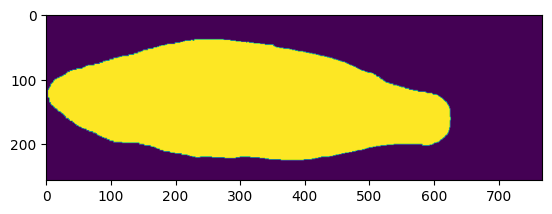

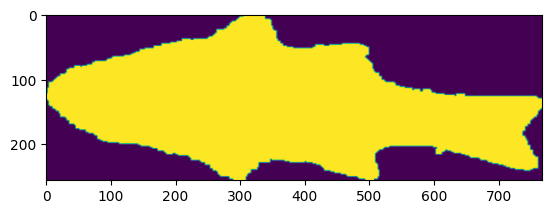

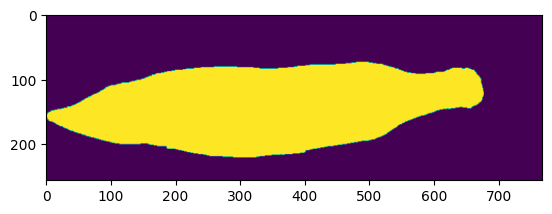

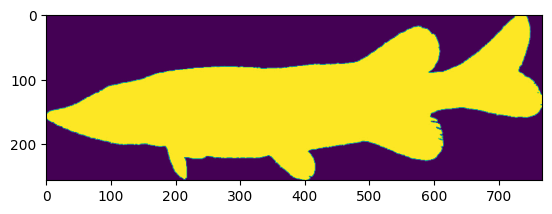

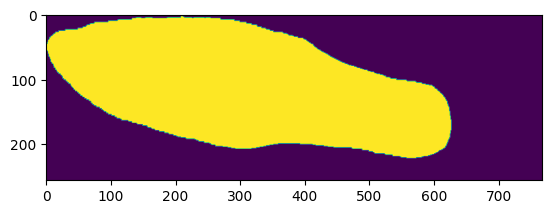

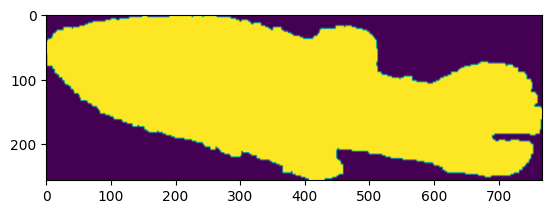

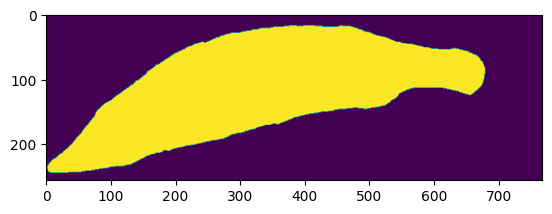

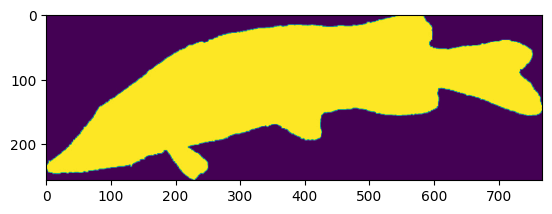

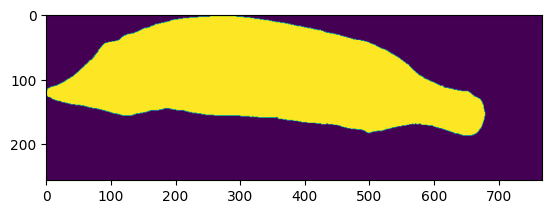

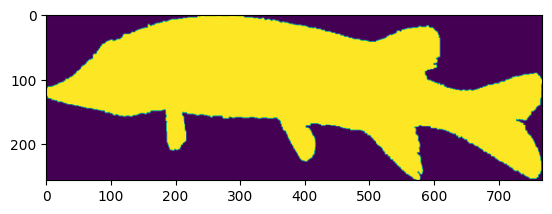

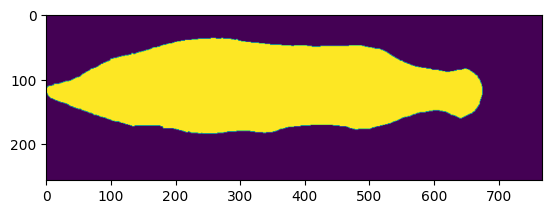

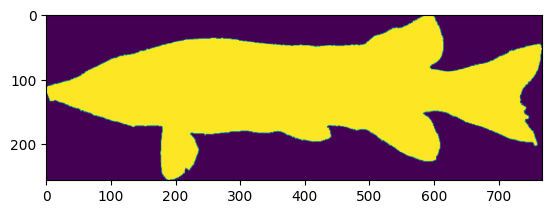

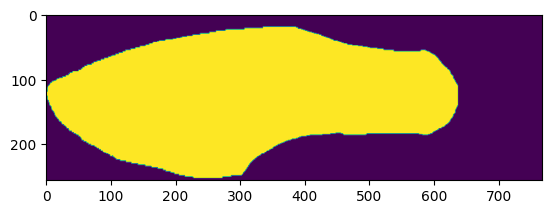

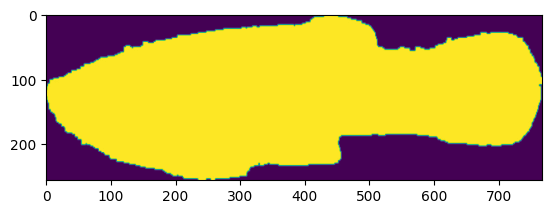

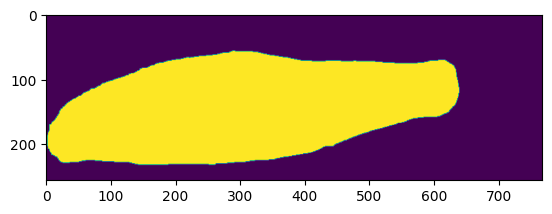

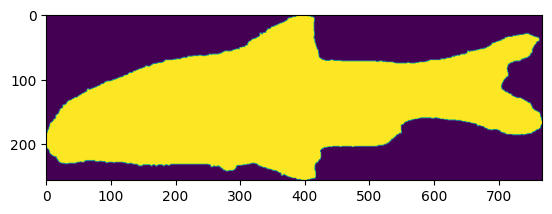

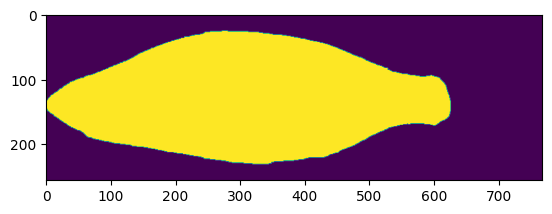

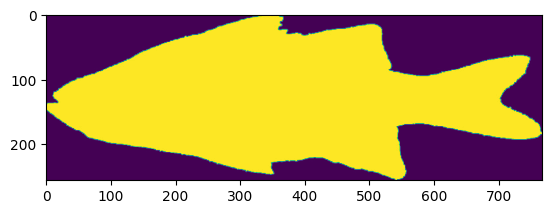

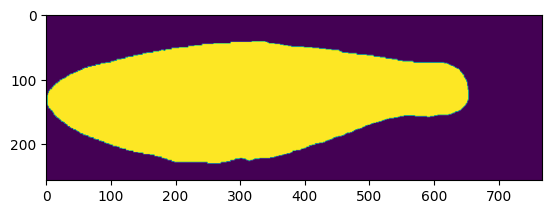

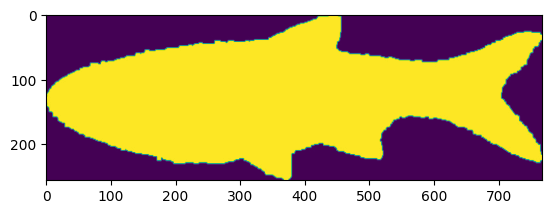

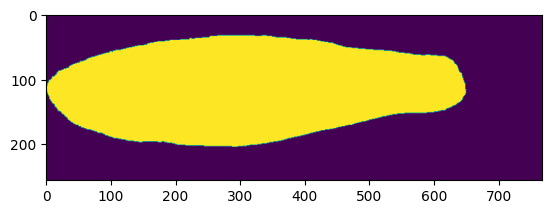

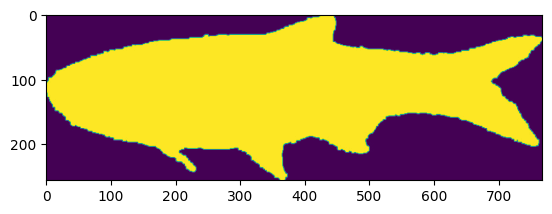

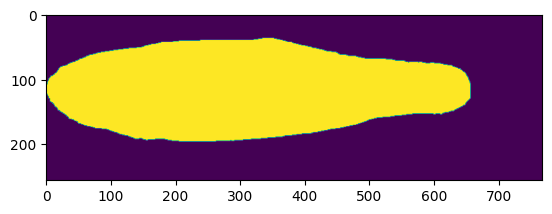

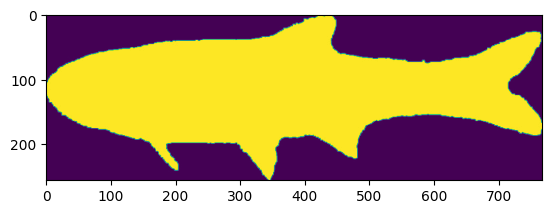

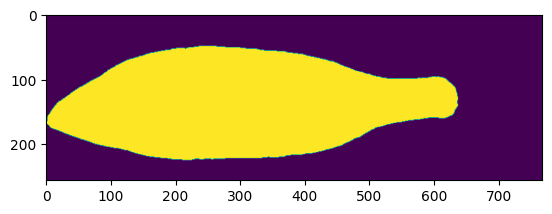

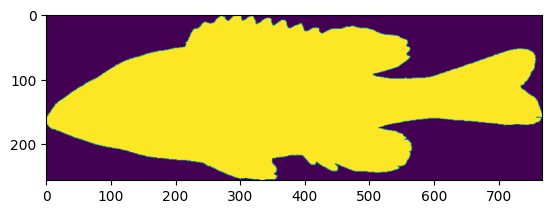

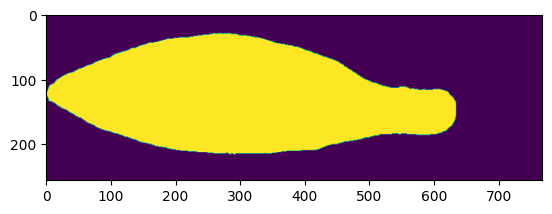

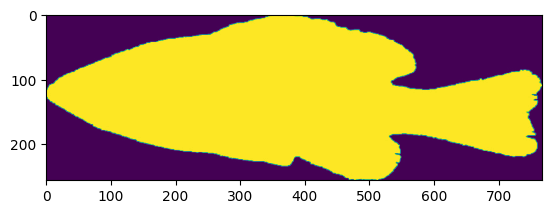

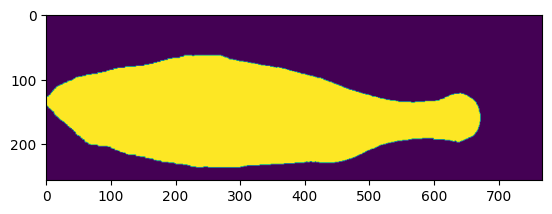

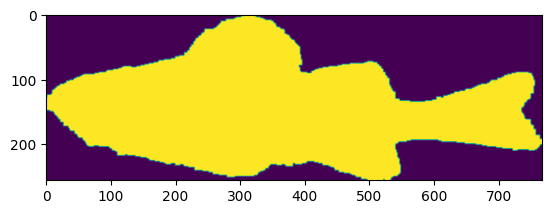

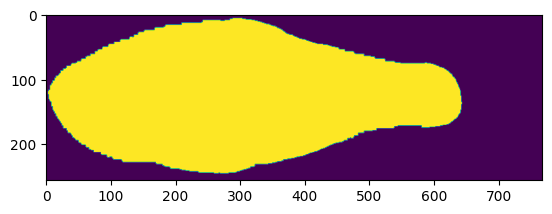

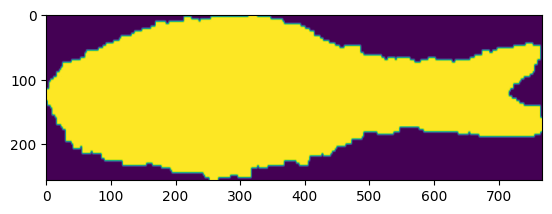

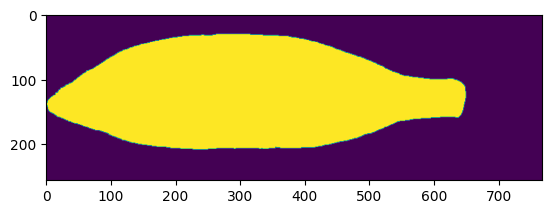

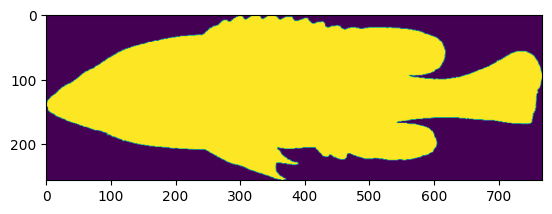

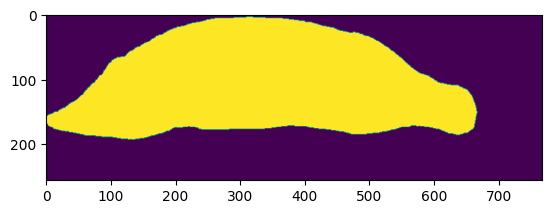

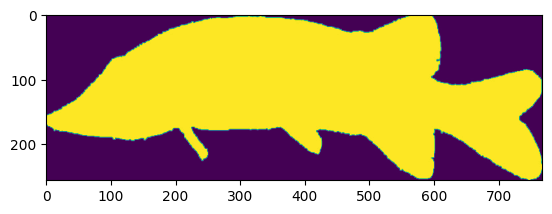

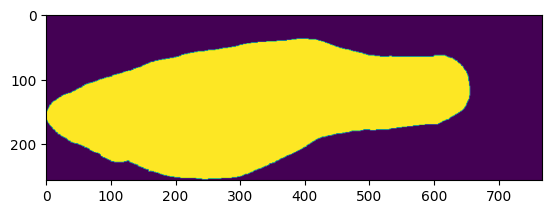

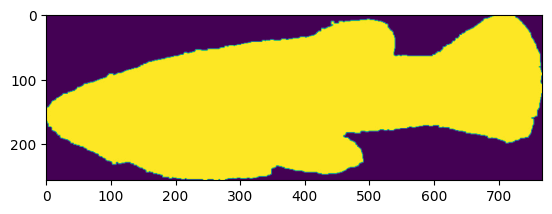

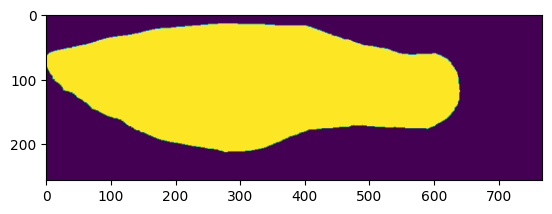

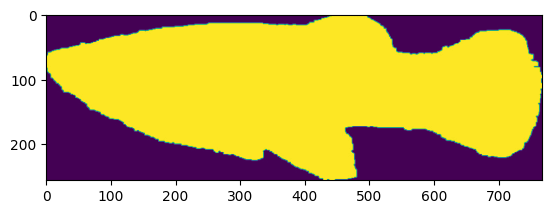

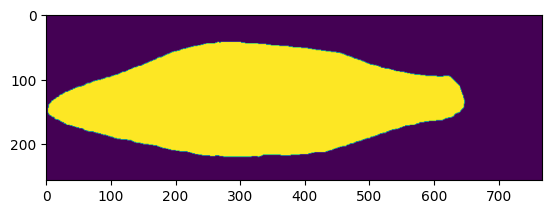

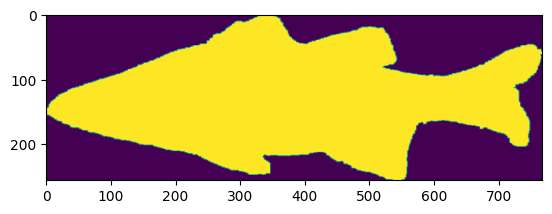

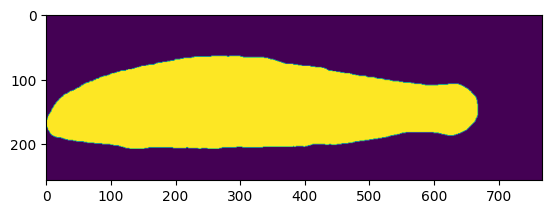

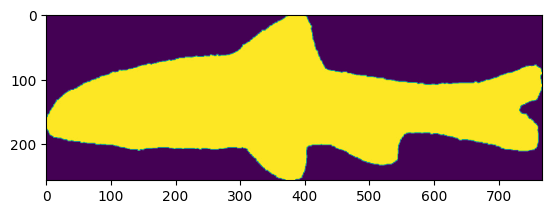

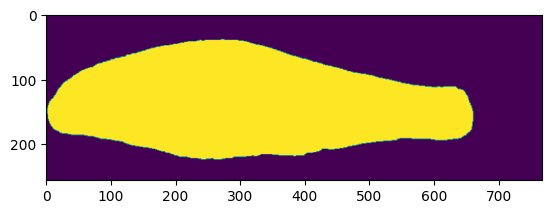

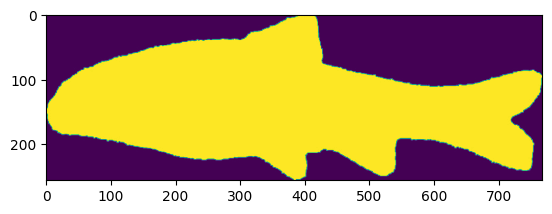

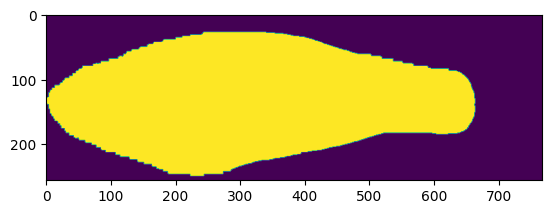

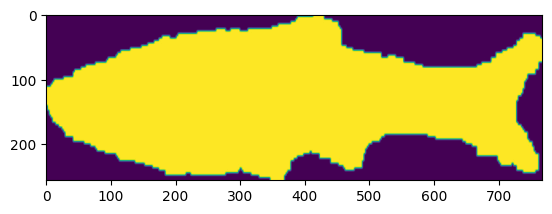

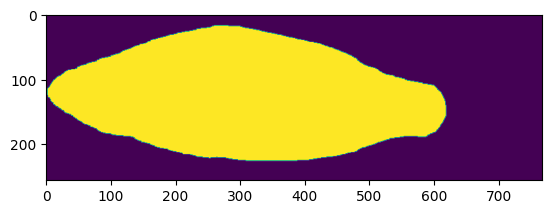

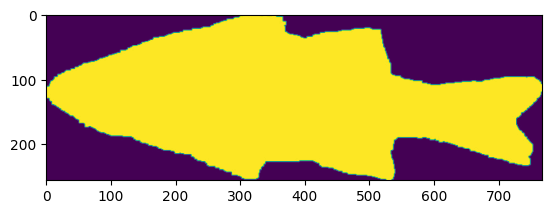

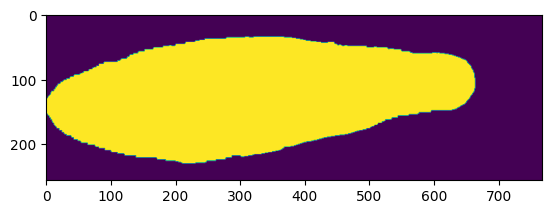

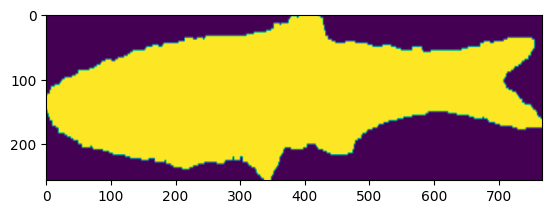

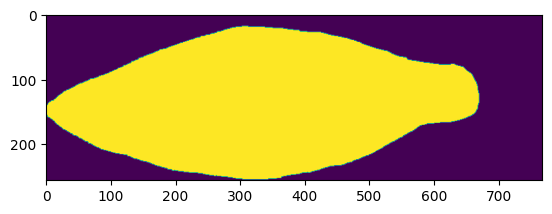

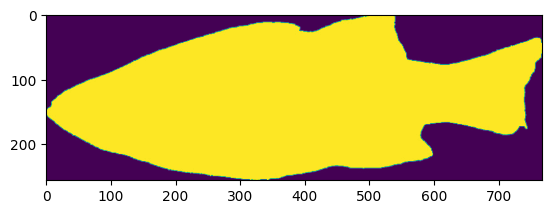

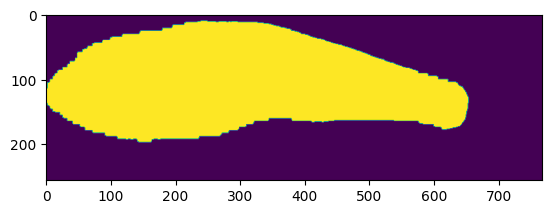

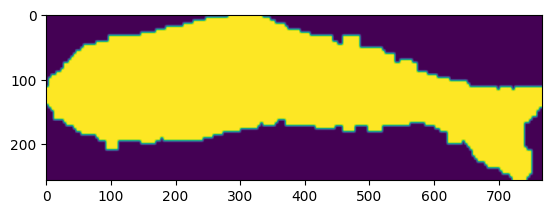

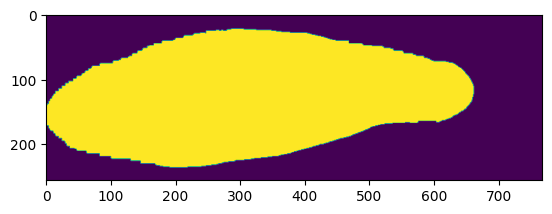

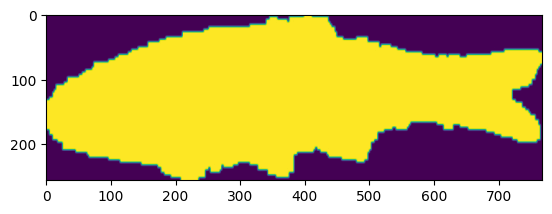

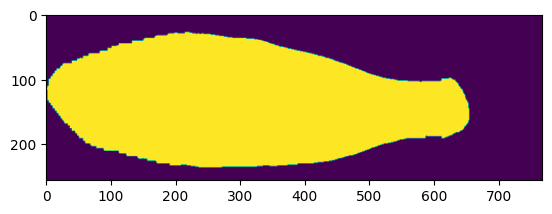

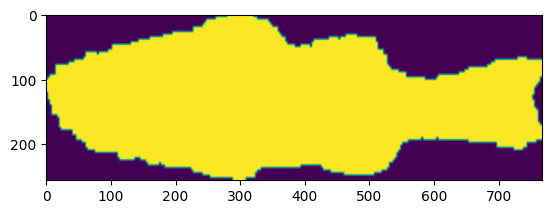

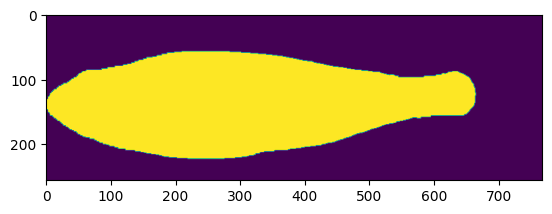

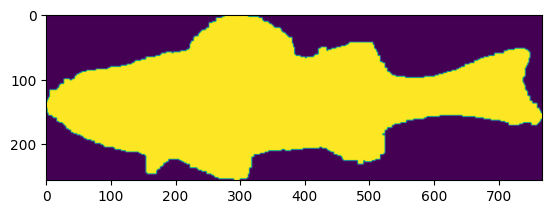

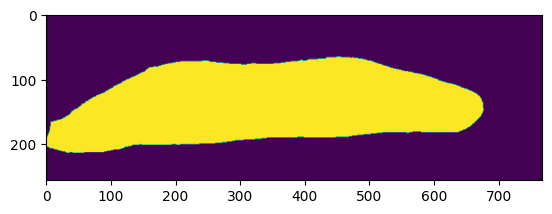

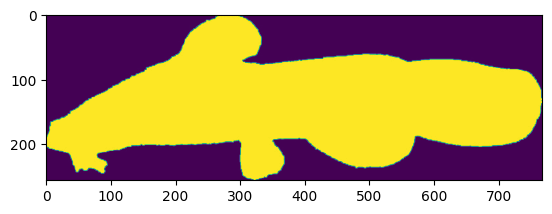

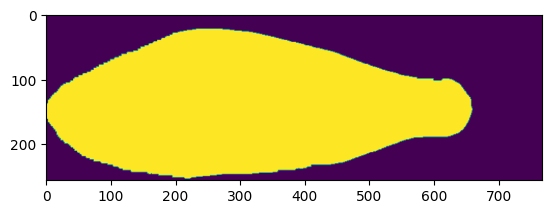

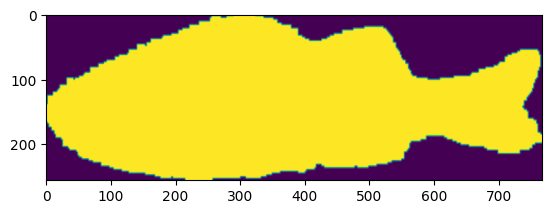

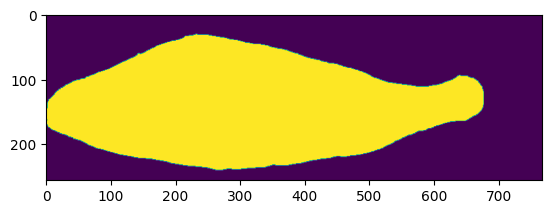

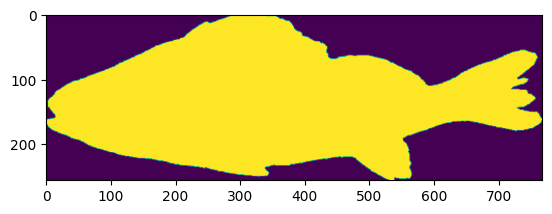

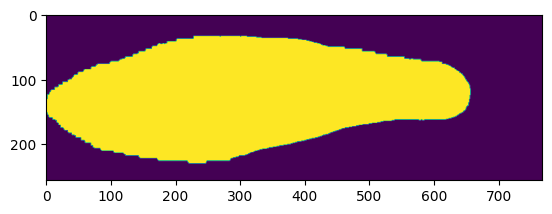

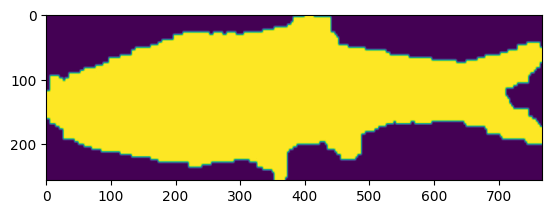

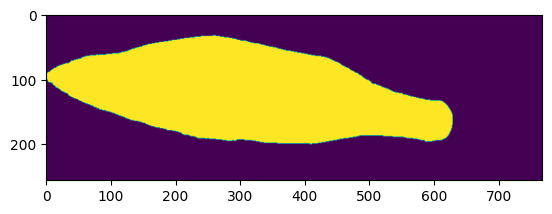

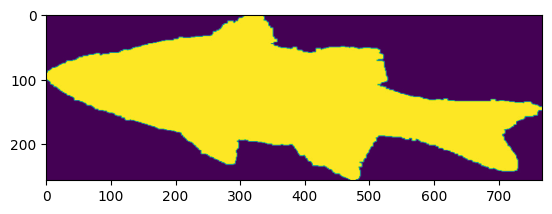

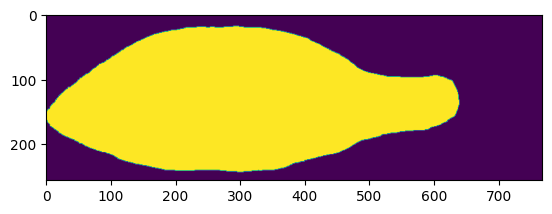

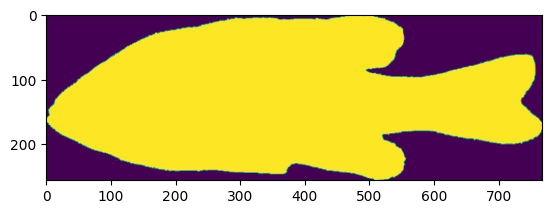

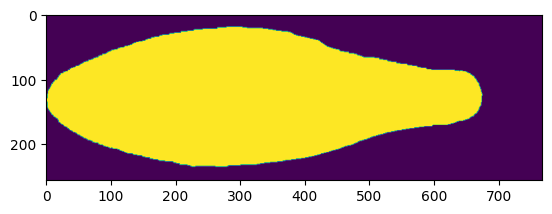

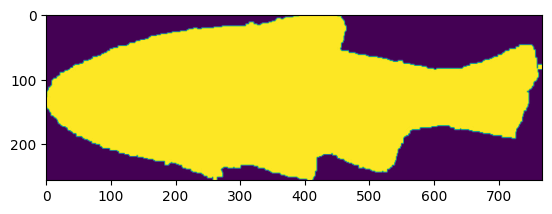

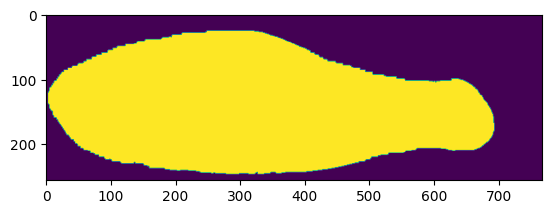

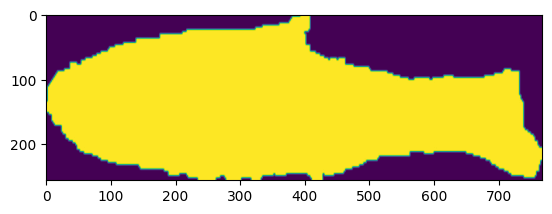

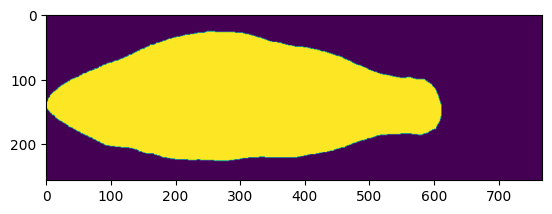

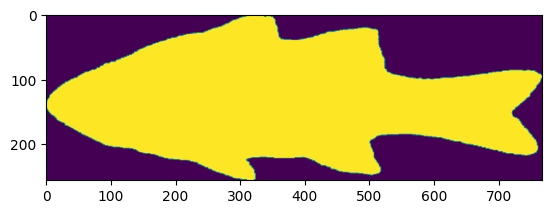

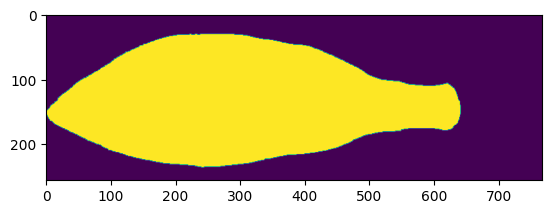

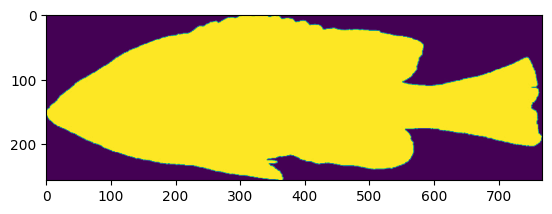

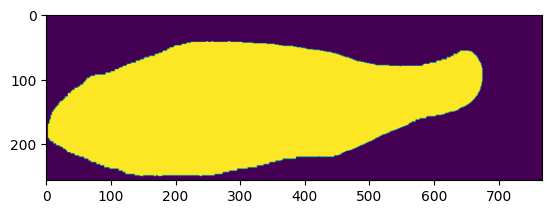

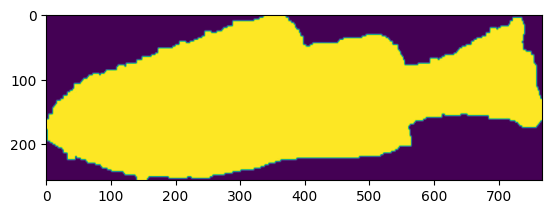

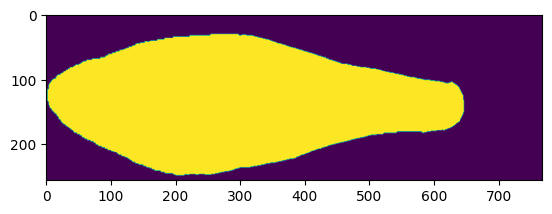

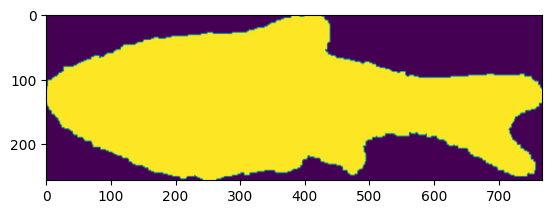

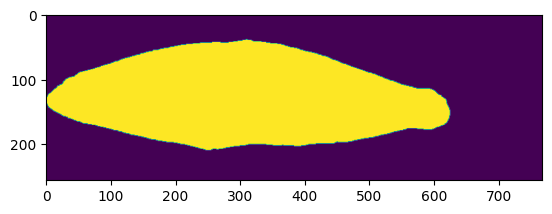

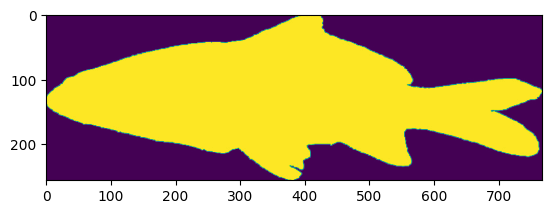

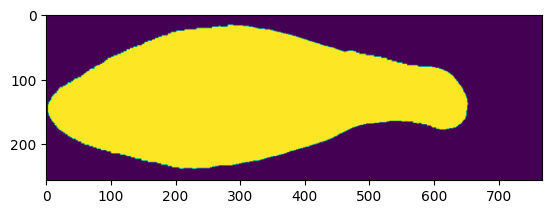

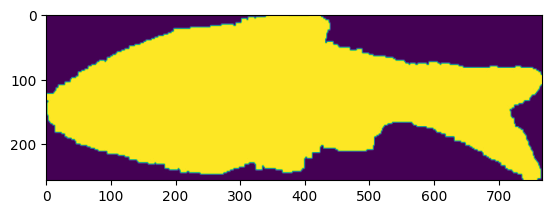

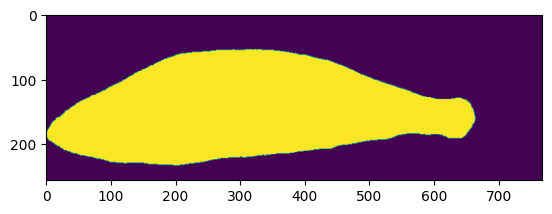

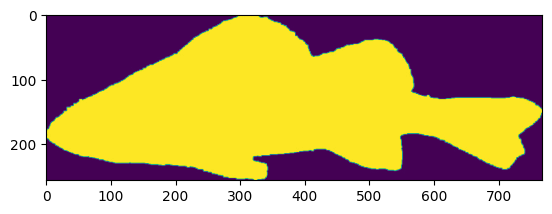

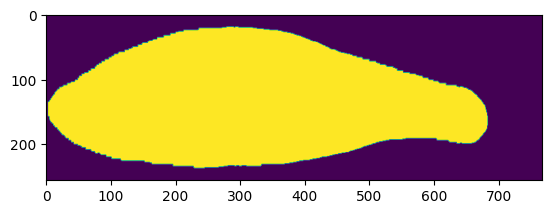

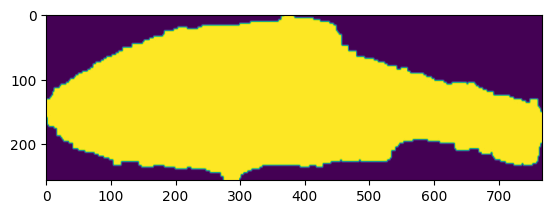

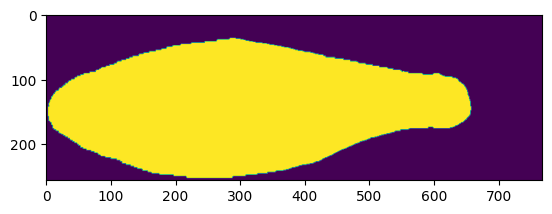

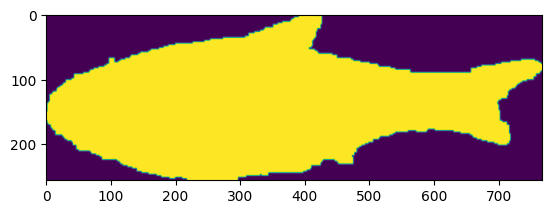

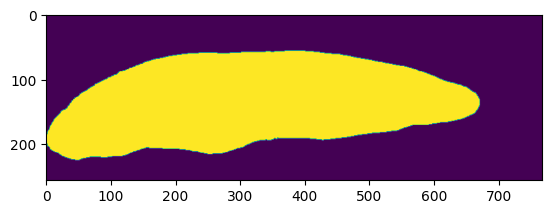

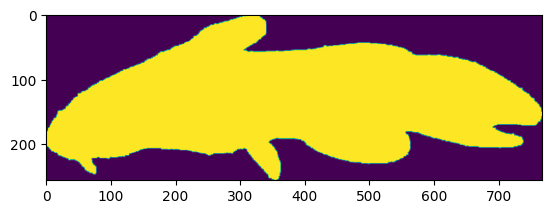

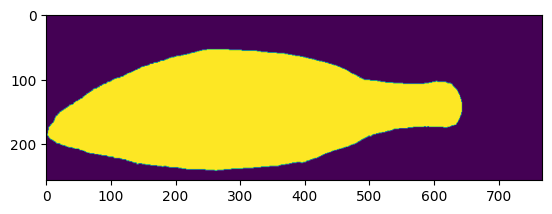

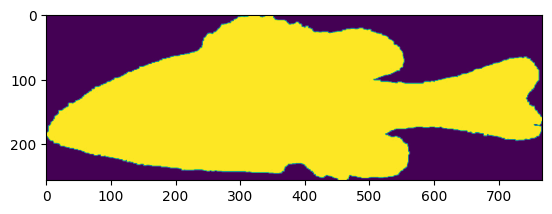

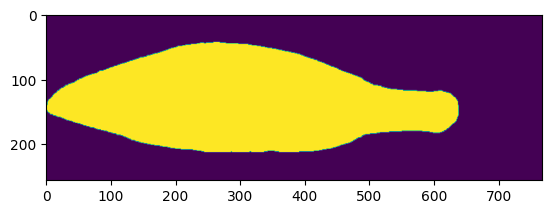

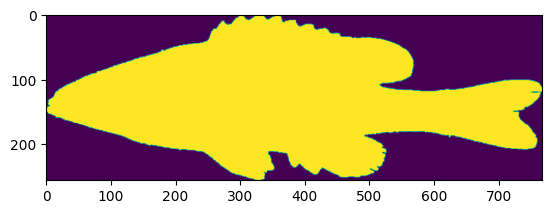

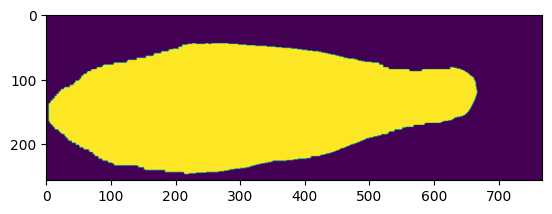

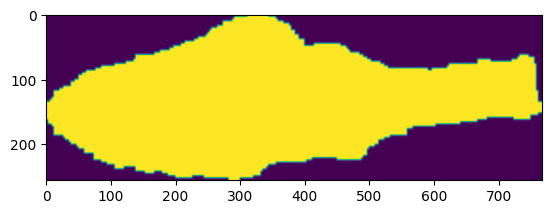

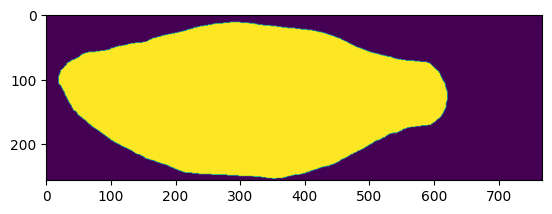

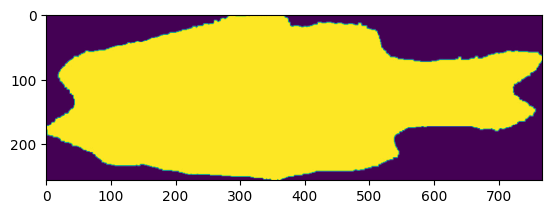

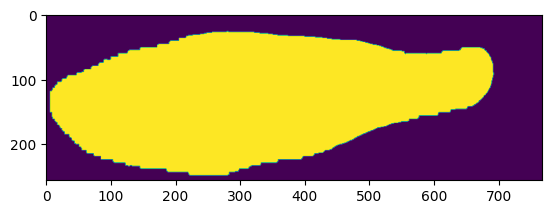

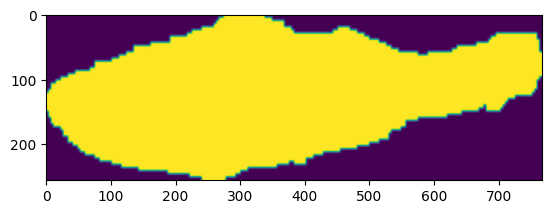

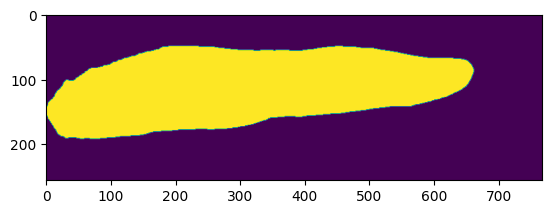

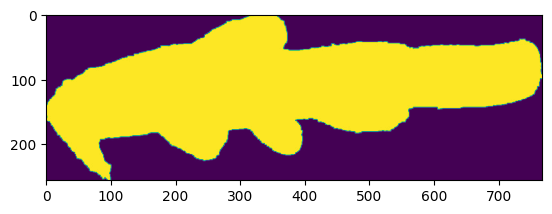

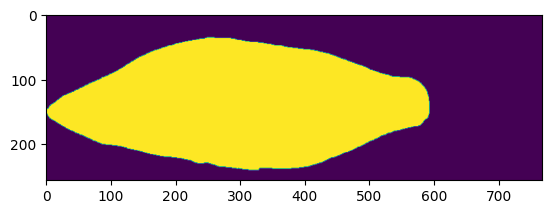

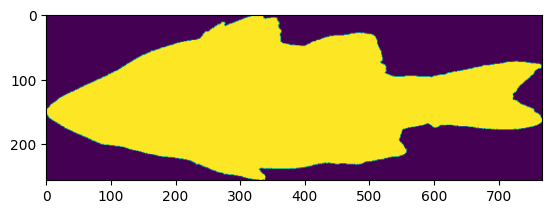

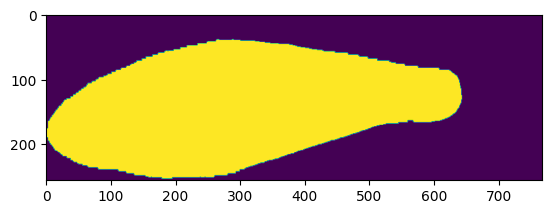

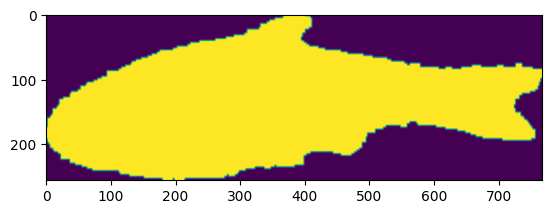

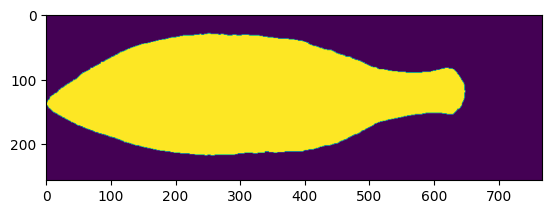

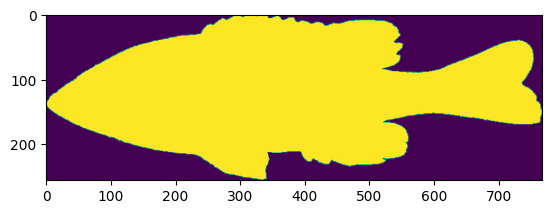

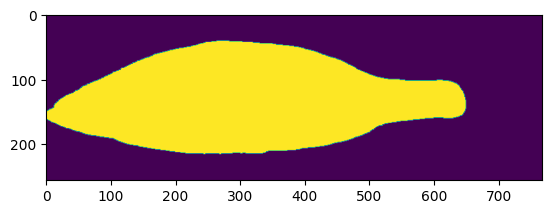

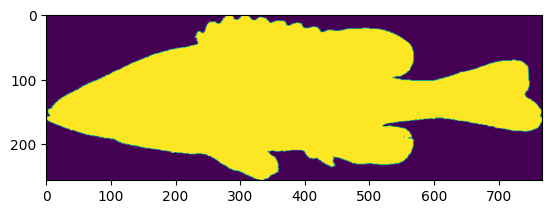

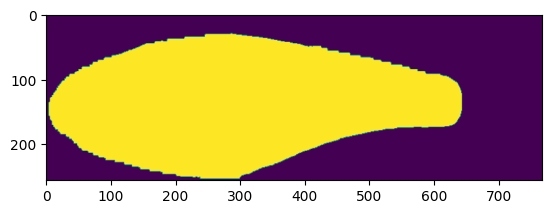

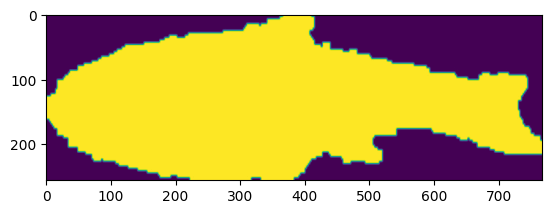

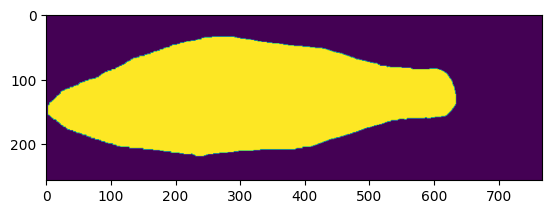

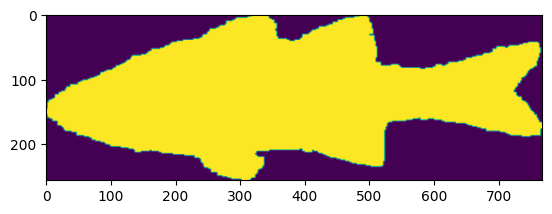

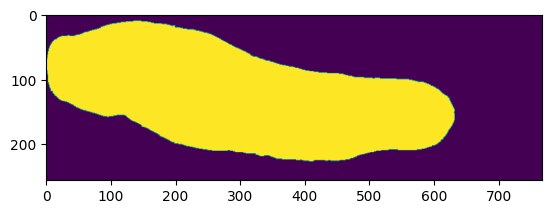

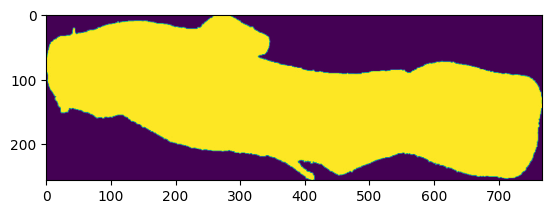

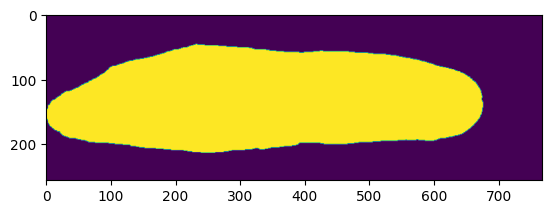

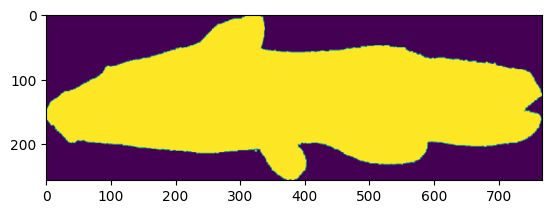

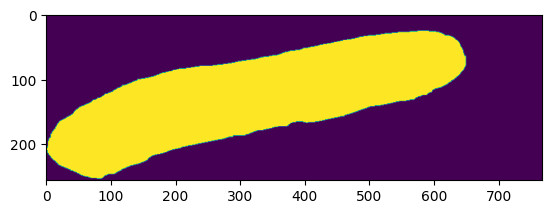

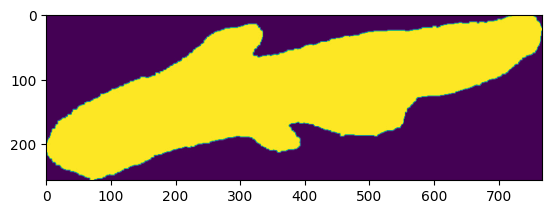

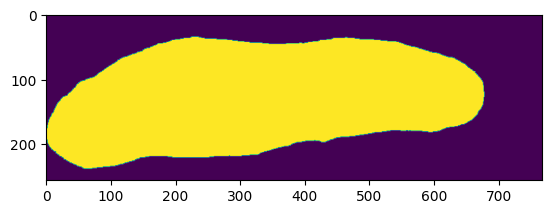

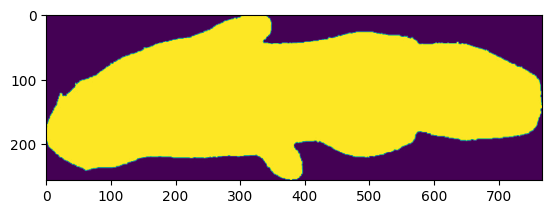

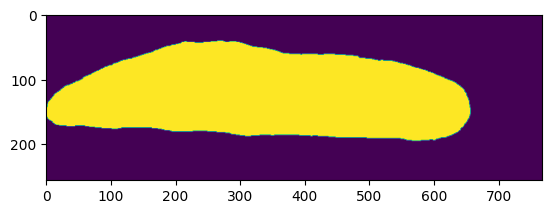

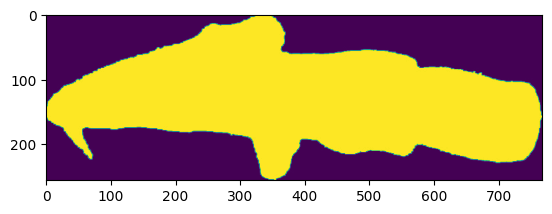

In [ ]:
for idx, image in enumerate(imagens_crop):

    plt.imshow(image)
    plt.show()


    plt.imshow(imagens_no_crop[idx])
    plt.show()

In [ ]:
imagens_crop[0].shape

(256, 768, 1)

In [ ]:
imagens_no_crop[0].shape

(256, 768, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


In [ ]:
def custom_loss(y_true, y_pred, z_mean, z_log_var, beta=0.000):
    #reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))

    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    total_loss = reconstruction_loss + beta * kl_loss  # Ajuste o beta conforme necessário
    return total_loss



In [ ]:
imagens_crop[0].shape

(256, 768, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_encoder(latent_dim):
    input_shape = (256, 768, 1)  # Ajustado para as novas dimensões da imagem
    inputs = tf.keras.Input(shape=input_shape)

    # Primeira camada convolutiva com mais filtros e BatchNormalization
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Segunda camada convolutiva
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Terceira camada convolutiva
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Flatten()(x)

    # Transição para o espaço latente
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)

    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

    encoder = models.Model(inputs, [z_mean, z_log_var], name='encoder')
    return encoder







In [ ]:

def build_decoder(latent_dim):
    input_shape = (latent_dim,)  # Input shape do espaço latente
    latent_inputs = tf.keras.Input(shape=input_shape)

    # Ajuste inicial para dimensões que podem ser precisamente upscaled para 256x768
    x = layers.Dense(16 * 48 * 128, activation='relu')(latent_inputs)
    x = layers.Reshape((16, 48, 128))(x)
    x = layers.BatchNormalization()(x)

    # Primeiro Upsampling para 32x96
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Segundo Upsampling para 64x192
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Terceiro Upsampling para 128x384
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Quarto Upsampling para 256x768
    x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Refinamento de detalhes, se necessário
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Camada de saída
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = models.Model(latent_inputs, outputs, name='decoder')
    return decoder








In [ ]:
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.reparameterize(z_mean, z_log_var)
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        x, y_true = data  # x são as imagens de entrada, y_true são as imagens modificadas (objetivo)

        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(x)
            z = self.reparameterize(z_mean, z_log_var)
            y_pred = self.decoder(z)
            loss = custom_loss(y_true, y_pred, z_mean, z_log_var)

        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {'loss': loss}

    def reparameterize(self, z_mean, z_log_var):
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [ ]:
#input_shape = (40, 96, 1)  #
latent_dim = 5  #

encoder = build_encoder(latent_dim)


In [ ]:
decoder = build_decoder(latent_dim)  # A saída tem o mesmo formato que a entrada neste exemplo
print(decoder)

In [ ]:
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_5 (Dense)             (None, 98304)             589824    
                                                                 
 reshape_1 (Reshape)         (None, 16, 48, 128)       0         
                                                                 
 batch_normalization_11 (Ba  (None, 16, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 32, 96, 128)       147584    
 Transpose)                                                      
                                                                 
 batch_normalization_12 (Ba  (None, 32, 96, 128)       512 

In [ ]:
vae = VAE(encoder, decoder)
print(VAE)


<class '__main__.VAE'>


In [ ]:
from tensorflow.keras import optimizers

# Definindo uma taxa de aprendizagem menor
learning_rate = 0.001

# Criando um otimizador com a taxa de aprendizagem especificada
optimizer = optimizers.Adam(learning_rate=learning_rate)

# Compilando o modelo com o otimizador ajustado
vae.compile(optimizer=optimizer, loss='sua_funcao_de_perda', metrics=['sua_metrica'])

In [ ]:
imagens_no_crop[0].shape

(256, 768, 1)

In [ ]:
import numpy as np


# Treinamento do modelo
vae.fit(x=imagens_no_crop, y=imagens_crop, epochs=2500, batch_size=20)

Epoch 1/2500
5/5 [==============================] - 8s 349ms/step - loss: 0.6920
Epoch 2/2500
5/5 [==============================] - 2s 342ms/step - loss: 0.6895
Epoch 3/2500
5/5 [==============================] - 2s 341ms/step - loss: 0.6856
Epoch 4/2500
5/5 [==============================] - 2s 345ms/step - loss: 2724289.5662
Epoch 5/2500
5/5 [==============================] - 2s 359ms/step - loss: 0.6782
Epoch 6/2500
5/5 [==============================] - 2s 350ms/step - loss: 0.6626
Epoch 7/2500
5/5 [==============================] - 2s 351ms/step - loss: 0.6318
Epoch 8/2500
5/5 [==============================] - 2s 353ms/step - loss: 0.5698
Epoch 9/2500
5/5 [==============================] - 2s 354ms/step - loss: 0.4714
Epoch 10/2500
5/5 [==============================] - 2s 354ms/step - loss: 0.4490
Epoch 11/2500
5/5 [==============================] - 2s 356ms/step - loss: 0.4170
Epoch 12/2500
5/5 [==============================] - 2s 360ms/step - loss: 0.3885
Epoch 13/2500
5/5 [

KeyboardInterrupt: 

In [ ]:
# Print the shape of the input tensors
print(imagens_no_crop.shape, imagens_crop.shape)

# Check the available GPU memory
print(tf.config.experimental.get_memory_info('GPU:0'))

(90, 256, 768, 1) (90, 256, 768, 1)
{'current': 1603447552, 'peak': 13806898432}


1/1 [==============================] - 0s 85ms/step
Bifurcação encontrada. Interrupção do rastreamento.
deletando...
Bifurcação encontrada. Interrupção do rastreamento.
Bifurcação encontrada. Interrupção do rastreamento.
Bifurcação encontrada. Interrupção do rastreamento.
deletando...
Bifurcação encontrada. Interrupção do rastreamento.
Bifurcação encontrada. Interrupção do rastreamento.
Bifurcação encontrada. Interrupção do rastreamento.
deletando...
Bifurcação encontrada. Interrupção do rastreamento.
deletando...
Bifurcação encontrada. Interrupção do rastreamento.
Bifurcação encontrada. Interrupção do rastreamento.
Bifurcação encontrada. Interrupção do rastreamento.
deletando...


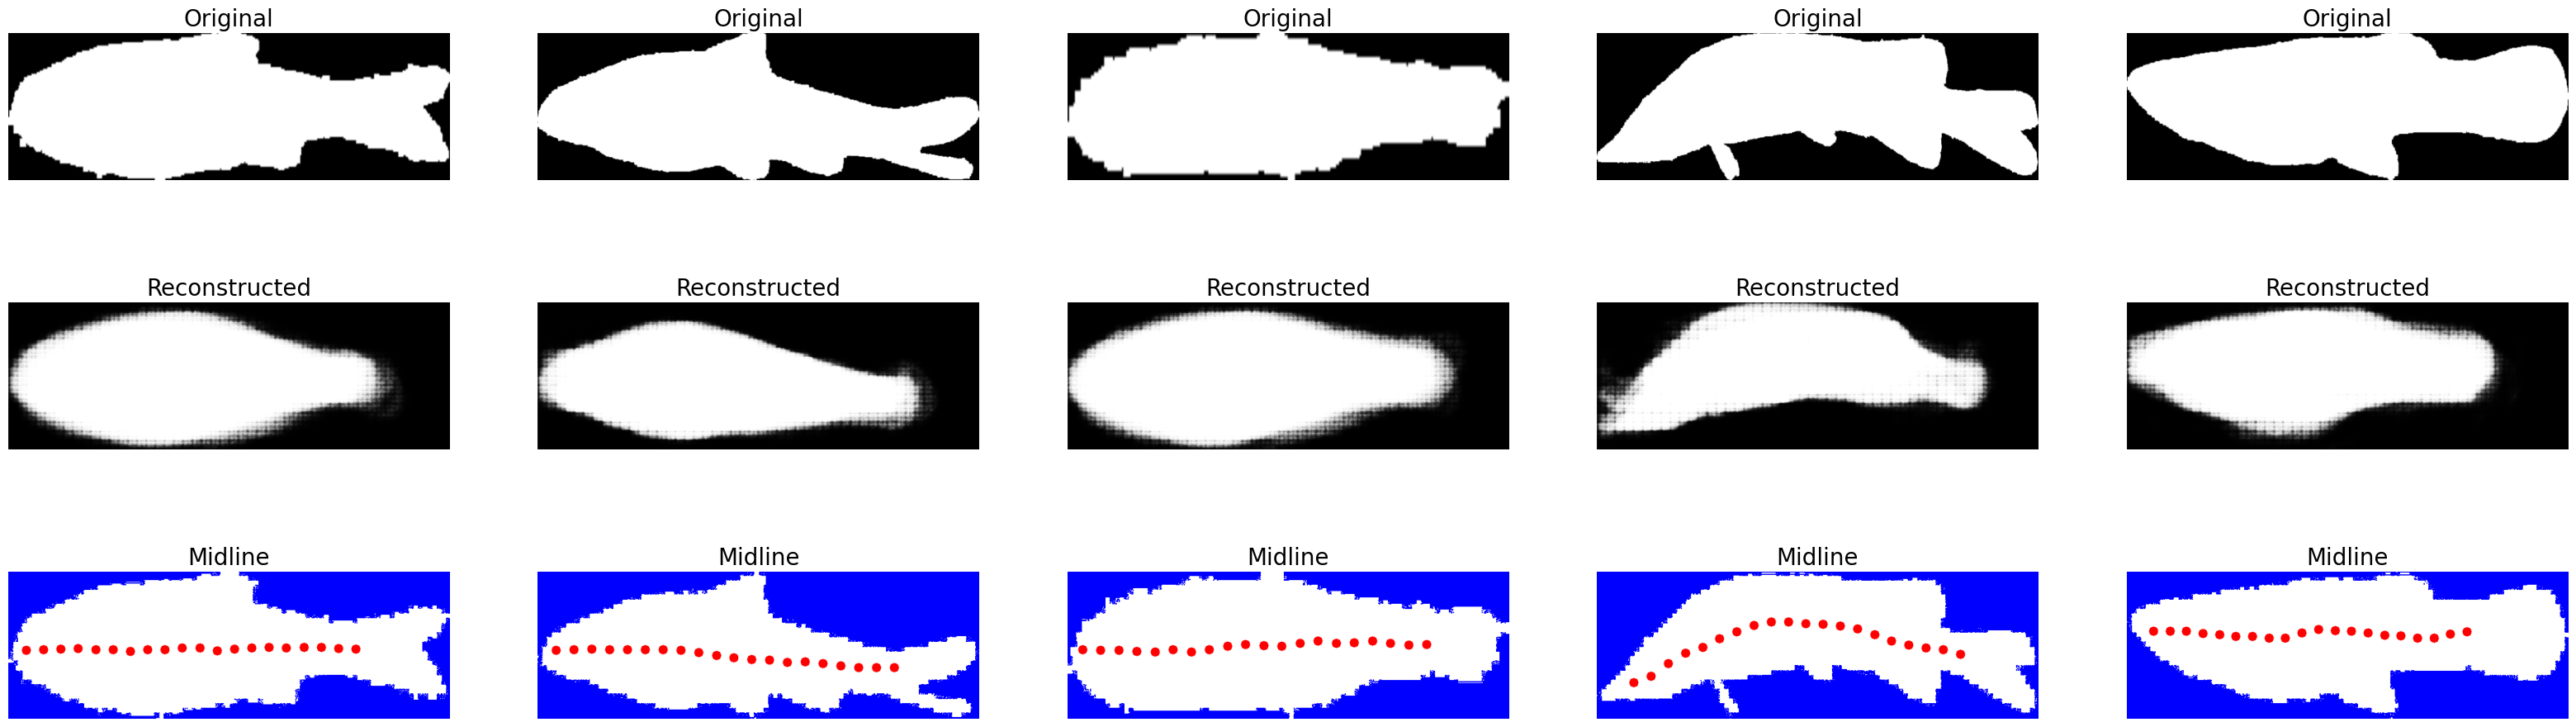

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize, medial_axis
from skimage.util import invert
from skimage.measure import label, regionprops
from skimage.draw import line
from skimage.morphology import skeletonize_3d
import numpy as np
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

def draw_circle(image, center, radius, value):
    """
    Desenha um círculo preenchido em uma imagem 2D ao redor de um ponto central.

    Parâmetros:
    - image: A imagem onde o círculo será desenhado (numpy array 2D).
    - center: Uma tupla (x, y) do centro do círculo.
    - radius: O raio do círculo.
    - value: O valor de intensidade para preencher o círculo.
    """
    ox, oy = center
    Y, X = np.ogrid[:image.shape[0], :image.shape[1]]
    dist_from_center = np.sqrt((X - ox)**2 + (Y - oy)**2)
    mask = dist_from_center <= radius
    image[mask] = value

def visualize_reconstruction_with_skeleton(encoder, decoder, images, n=5):
    import numpy as np
    from skimage.morphology import skeletonize_3d


    z_mean, _ = encoder.predict(images[:n])
    reconstructed_images = decoder.predict(z_mean)

    plt.figure(figsize=(40, 12))
    for i in range(n):
        # Imagem original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title("Original", fontsize=20)
        ax.axis('off')

        # Imagem reconstruída
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
        plt.title("Reconstructed", fontsize=20)
        ax.axis('off')

        # Esqueletonização
        # Assumindo que as imagens reconstruídas estão em escala de cinza, pulamos a conversão
        recon_image_gray = reconstructed_images[i].squeeze()
        #print(recon_image_gray)


        # Supondo que `imagem` seja sua imagem binária de entrada com valores 0-1
        #imagem = recon_image_gray.astype(np.uint8) * 255  # Conversão para uint8 e ajuste de valores para 0-255

        recon_image_gray_norm = ((recon_image_gray - recon_image_gray.min()) * (255 / (recon_image_gray.max() - recon_image_gray.min()))).astype(np.uint8)

        # 2. Desfoque Gaussiano para reduzir o ruído
        imagem_desfocada = cv2.GaussianBlur(recon_image_gray_norm, (5, 5), 0)

        # 3. Binarização para garantir que a imagem permaneça binária
        _, imagem_binarizada = cv2.threshold(imagem_desfocada, 127, 255, cv2.THRESH_BINARY)

        # 4. Operações Morfológicas
        kernel = np.ones((9, 9), np.uint8)  # Ajuste o tamanho do kernel conforme necessário
        imagem_erodida = cv2.erode(imagem_binarizada, kernel, iterations=4)
        imagem_dilatada = cv2.dilate(imagem_erodida, kernel, iterations=4)

        imagem_normalizada = imagem_dilatada.astype(np.float32) / 255.0


        skeleton = skeletonize_3d(imagem_normalizada)
        #skeleton, distancia = medial_axis(imagem_normalizada, return_distance=True)


        import numpy as np
        from skimage.morphology import skeletonize_3d
        from skimage import io
        from skimage.measure import label, regionprops
        from scipy.spatial.distance import euclidean


        def identificar_endpoints(esqueleto):
            esqueleto = np.where(esqueleto > 0, 1, 0)
            altura, largura = esqueleto.shape
            endpoints = []

            for y in range(1, altura - 1):
                for x in range(1, largura - 1):
                    if esqueleto[y, x] == 1:  # Se é um pixel do esqueleto
                        #print("found a pixel")
                        # Conta os vizinhos esqueléticos
                        vizinhos = sum([
                            esqueleto[y-1, x-1], esqueleto[y-1, x], esqueleto[y-1, x+1],
                            esqueleto[y, x-1],                     esqueleto[y, x+1],
                            esqueleto[y+1, x-1], esqueleto[y+1, x], esqueleto[y+1, x+1]
                        ])
                        if vizinhos == 1:  # Endpoint tem exatamente um vizinho
                            endpoints.append((x, y))

            return endpoints



        def encontrar_pontos_de_bifurcacao(esqueleto):
            esqueleto = np.where(esqueleto > 0, 1, 0)
            altura, largura = esqueleto.shape
            pontos_de_bifurcacao = []

            for y in range(1, altura-1):
                for x in range(1, largura-1):
                    if esqueleto[y, x]:  # Se é um pixel do esqueleto
                        # Corrigido: Usa np.sum() para somar corretamente os valores dos vizinhos
                        vizinhos = np.sum(esqueleto[y-1:y+2, x-1:x+2]) - 1  # Conta vizinhos, exclui o próprio pixel
                        if vizinhos > 2:
                            pontos_de_bifurcacao.append((x, y))

                            #draw_circle(skeleton, (x, y), radius=3, value=255)
                            #plt.imshow(skeleton)
                            #plt.show()

            return pontos_de_bifurcacao


        from collections import deque

        from collections import deque
        import numpy as np

        def rastrear_ate_bifurcacao(esqueleto, endpoint):
            import numpy as np
            from collections import deque
            import matplotlib.pyplot as plt

            def draw_circle(image, point, radius=1, value=128):
                x, y = point
                for dx in range(-radius, radius + 1):
                    for dy in range(-radius, radius + 1):
                        if 0 <= x + dx < image.shape[1] and 0 <= y + dy < image.shape[0]:
                            image[y + dy, x + dx] = value

            altura, largura = esqueleto.shape
            visitados = np.zeros_like(esqueleto, dtype=bool)
            fila = deque([(endpoint, 0)])  # (x, y), distância
            caminho = []

            while fila:
                (x, y), distancia_atual = fila.popleft()

                if visitados[y, x]:
                    continue

                visitados[y, x] = True
                caminho.append((x, y))

                # Prepara a visualização do ponto atual no esqueleto
                esqueleto_visualizacao = np.copy(esqueleto) * 255
                draw_circle(esqueleto_visualizacao, (x, y), radius=1, value=128)  # Destaca o ponto atual

                # Extrai a submatriz 3x3 ao redor do ponto atual para análise
                submatriz = esqueleto[max(0, y-1):min(altura, y+2), max(0, x-1):min(largura, x+2)]
                #print("Submatriz 3x3 ao redor do ponto atual:")
                #print(submatriz)

                pontos_ao_redor = np.sum(submatriz) - submatriz[1, 1] if submatriz.shape == (3, 3) else np.sum(submatriz)
                if pontos_ao_redor > 2:
                    print("Bifurcação encontrada. Interrupção do rastreamento.")
                    break

                # Mostra o esqueleto com o ponto atual destacado
                #plt.imshow(esqueleto_visualizacao, cmap='gray')
                #plt.title(f"Ponto atual: ({x}, {y}) - Distância: {distancia_atual}")
                #plt.show()

                # Considera todos os 8 vizinhos
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if dx == 0 and dy == 0:
                            continue  # Ignora o ponto central
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < largura and 0 <= ny < altura and esqueleto[ny, nx] == 1 and not visitados[ny, nx]:
                            fila.append(((nx, ny), distancia_atual + 1))  # Adiciona o ponto válido à fila

                #input("Pressione Enter para continuar...")
                import time
                #time.sleep(3)
            #print(distancia_atual)
            #print(caminho)
            return distancia_atual, caminho












        def deletar_ramos_pequenos(esqueleto, limiar_distancia):
            endpoints = identificar_endpoints(esqueleto)
            pontos_de_bifurcacao = encontrar_pontos_de_bifurcacao(esqueleto)

            for endpoint in endpoints:


                distancia, caminho = rastrear_ate_bifurcacao(esqueleto, endpoint)



                if distancia < limiar_distancia:
                    print("deletando...")

                    # Deleta o ramo seguindo o caminho de volta ao ponto de bifurcação
                    for ponto in caminho:
                        ponto = ponto[::-1]
                        esqueleto[ponto] = 0  # Exemplo de como deletar, ajuste conforme necessário


                        #draw_circle(esqueleto, ponto, radius=1, value=255)
                        #plt.imshow(esqueleto)
                        #plt.show()


            return esqueleto

        # Observação: Esta é uma representação muito simplificada. A implementação específica dependerá
        # da representação do esqueleto (por exemplo, imagem binária, grafo etc.) e das bibliotecas que você está usando.



        #print(skeleton)
        skeleton = np.where(skeleton > 0, 1, 0)


        esqueleto = deletar_ramos_pequenos(skeleton, 100)

        # Cria uma imagem colorida com fundo azul
        image = images[i].squeeze()
        imagem_colorida = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
        imagem_colorida[..., 2] = 255  # Todos os pixels com componente azul máximo

        # Aplica a imagem do peixe (transforma pixels do peixe em branco)
        imagem_colorida[image == 1] = [255, 255, 255]  # Transforma o peixe em branco


        y, x = np.where(esqueleto == 1)

        pontos = zip(x, y)  # Cria pares de coordenadas (x, y)

        pontos_ordenados = sorted(pontos, key=lambda ponto: ponto[0])

        #print(pontos_ordenados)

        pontos_incrementais = []
        ultimo_x = None
        for ponto in pontos_ordenados:
            x, y = ponto
            if ultimo_x is None or x > ultimo_x:  # Adiciona ponto se 'x' é maior que o último 'x' adicionado
                pontos_incrementais.append(ponto)
                ultimo_x = x

        #print(pontos_incrementais)

        # Convertendo para arrays x e y para possível interpolação
        x = np.array([ponto[0] for ponto in pontos_incrementais])
        y = np.array([ponto[1] for ponto in pontos_incrementais])


        # Sobrepondo o esqueleto na imagem reconstruída
        ax = plt.subplot(3, n, i + 1 + 2*n)

        # Assegura que a imagem e o esqueleto estão na forma esperada (altura, largura)
        image = images[i].squeeze()  # A imagem do peixe
        esqueleto = esqueleto.squeeze()  # A imagem binária do esqueleto

        # Utiliza a interpolação spline cúbica


        cs = CubicSpline(x, y)

        # Gera um novo conjunto de pontos x para a interpolação, para uma linha mais suave
        x_interp = np.linspace(x.min(), x.max(), 20)
        y_interp = cs(x_interp)

        # Arredondar para o inteiro mais próximo e converter para int
        x_interp_rounded = np.round(x_interp).astype(int)
        y_interp_rounded = np.round(y_interp).astype(int)

        pontos_interp = list(zip(x_interp_rounded, y_interp_rounded))


        for x, y in pontos_interp:
            #print(pontos_interp)
            cv2.circle(imagem_colorida, (x, y), radius=8, color=(255, 0, 0), thickness=-1)


        # Mostra a imagem resultante
        plt.imshow(imagem_colorida)
        plt.title("Midline", fontsize=20)
        ax.axis('off')
        #print(esqueleto)






# Exemplo de uso da função
visualize_reconstruction_with_skeleton(encoder, decoder, imagens_no_crop)


In [ ]:
import plotly.graph_objects as go

# Supondo que z_mean tenha pelo menos três dimensões
z_mean, _ = encoder.predict(imagens_no_crop)

# Cria a figura para plotagem 3D interativa
fig = go.Figure(data=[go.Scatter3d(
    x=z_mean[:, 0],
    y=z_mean[:, 1],
    z=z_mean[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        opacity=0.5
    )
)])

# Define os rótulos dos eixos
fig.update_layout(scene = dict(
                    xaxis_title='Z_Mean Dimension 1',
                    yaxis_title='Z_Mean Dimension 2',
                    zaxis_title='Z_Mean Dimension 3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

# Define o título
fig.update_layout(title='3D Visualization of Latent Space')

# Mostra o gráfico
fig.show()

